<a href="https://colab.research.google.com/github/SantiagoVillarreal01/aprendizaje-automatico-252601/blob/main/4_1_Medidas_de_Similitud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🎓 **Taller 4.1: Taller de Medidas de Similitud y Disimilitud**


## OBJETIVOS DEL TALLER:
Comprender y aplicar diferentes medidas de similitud y disimilitud en conjuntos de datos, analizando su comportamiento en distintos contextos de distribución de datos. Implementar y calcular al menos 6 medidas de distancia diferentes:

* ✅Distancia Euclidiana (L2)
* ✅Distancia Manhattan (L1)
* ✅Distancia Chebyshev (L∞)
* ✅Similitud de Coseno
* ✅Distancia de Mahalanobis
* ✅Distancia de Jaccard

Representar gráficamente datasets en espacios bidimensionales

* ✅Visualizar centros y puntos de referencia en gráficos de dispersión
* ✅Interpretar relaciones espaciales a partir de representaciones visuales

# 🔧 **CONFIGURACIÓN INICIAL**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8, 8]

In [3]:
import scipy.stats as st

def visualize_dataset(x, y, ds_center, c1, c2):
  fig, ax = plt.subplots()
  ax.scatter(x, y)
  ds_center_r = [np.mean(x), np.mean(y)]
  print(f'Centro real del cluster: x={ds_center_r[0]:.2f}, y={ds_center_r[1]:.2f}')
  print(f'Centro del cluster utilizado para el ejemplo: x={ds_center[0]:.2f}, y={ds_center[1]:.2f}')
  ax.scatter(ds_center[0], ds_center[1], s=200, c='b')
  # plot candidates
  ax.scatter(c1[0], c1[1], s=200, c='r')
  ax.scatter(c2[0], c2[1], s=200, c='g', marker='v')
  deltaX = (max(x) - min(x))/10
  deltaY = (max(y) - min(y))/10
  xmin = min(x) - deltaX
  xmax = max(x) + deltaX
  ymin = min(y) - deltaY
  ymax = max(y) + deltaY
  # Create meshgrid
  xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
  positions = np.vstack([xx.ravel(), yy.ravel()])
  values = np.vstack([x, y])
  kernel = st.gaussian_kde(values)
  f = np.reshape(kernel(positions).T, xx.shape)
  # create gaussian contour lines
  cfset = ax.contourf(xx, yy, f, cmap='coolwarm', alpha=0.2)
  ax.imshow(np.rot90(f), cmap='coolwarm', extent=[xmin, xmax, ymin, ymax], alpha=0.2)
  # write labels
  cset = ax.contour(xx, yy, f, colors='k', linestyles='dotted')
  ax.clabel(cset, inline=1, fontsize=10)
  ax.set_xlabel('X')
  ax.set_ylabel('Y')
  plt.title('Kernel Gaussiano 2D')

In [4]:
def visualize_scatter(x, y, ds_center, c1, c2):
  ds_center_real= [np.mean(x), np.mean(y)]
  plt.figure(figsize=(8, 6))  # Tamaño del gráfico
  plt.scatter(x, y, color='blue', alpha=0.6, label='Puntos de datos')
  plt.scatter(ds_center[0], ds_center[1], color='red', marker='X', s=100, label='Centro [2, 2]')
  plt.scatter(ds_center_real[0], ds_center_real[1], color='y', marker='X', s=100, label='Centro Real')
  plt.scatter(c1[0], c1[1], s=200, c='red', label='Candidato 1 (rojo)')
  plt.scatter(c2[0], c2[1], s=200, c='green', marker='v', label='Candidato 2 (verde)')
  plt.xlabel('Variable 1 (data_var_1)')
  plt.ylabel('Variable 2 (data_var_2)')
  plt.title('Dataset 2D con Distribución Normal alrededor de [2, 2]')
  plt.grid(True, linestyle='--', alpha=0.5)
  plt.legend()
  plt.show()

# 📁 **CREAR LOS DATASETS Y GRAFIQUE SUS DISTRIBUCIONES**

In [5]:
# Crear un dataset artificial alrededor de un punto
def cargar_datasetDistNormal(n_data_points = 50, ds_center = np.array([2, 2])):
    # para hacer los experimentos reproducibles
    np.random.seed(42)
    # generamos los puntox en 2D con funcion normal, al rededor del centro
    data_var_1 = np.random.randn(n_data_points) + ds_center[0]
    data_var_2 = np.random.randn(n_data_points) + ds_center[1]
    return data_var_1, data_var_2

In [6]:
# Crear un dataset artificial alrededor de un punto con una relacion lineal de dependencia entre las variables
def cargar_datasetRelacionLineal(factor=np.array([1, 1]), n_data_points = 50, ds_center = np.array([2, 2])):
    # para hacer los experimentos reproducibles
    np.random.seed(42)
    # generar los datos con una relacion lineal
    data_var_1b = factor[0] * np.random.randn(n_data_points) + ds_center[0]
    data_var_2b = data_var_1b + factor[1] * np.random.randn(n_data_points)
    return data_var_1b, data_var_2b

In [7]:
# Crear un dataset artificial alrededor de un punto con una relacion cuadratica de dependencia entre las variables
def cargar_datasetRelacionCuadratica(coeficientes=np.array([1, 0, 0]),
                                     n_data_points=50,
                                     rango_x=(-5, 5)):
    #coeficientes : array de 3 elementos [a, b, c]
    #    Coeficientes de la ecuación cuadrática: y = a*x² + b*x + c
    # Para hacer los experimentos reproducibles
    np.random.seed(42)
    # Extraer coeficientes
    a, b, c = coeficientes
    # Generar valores x uniformemente distribuidos
    x = np.random.uniform(rango_x[0], rango_x[1], n_data_points)
    # Aplicar la transformación cuadrática
    y_ideal = a * x**2 + b * x + c
    # Añadir ruido aleatorio (proporcional al rango de y)
    rango_y = np.max(y_ideal) - np.min(y_ideal)
    ruido = 0.1 * rango_y * np.random.randn(n_data_points)
    y = y_ideal + ruido
    return x, y

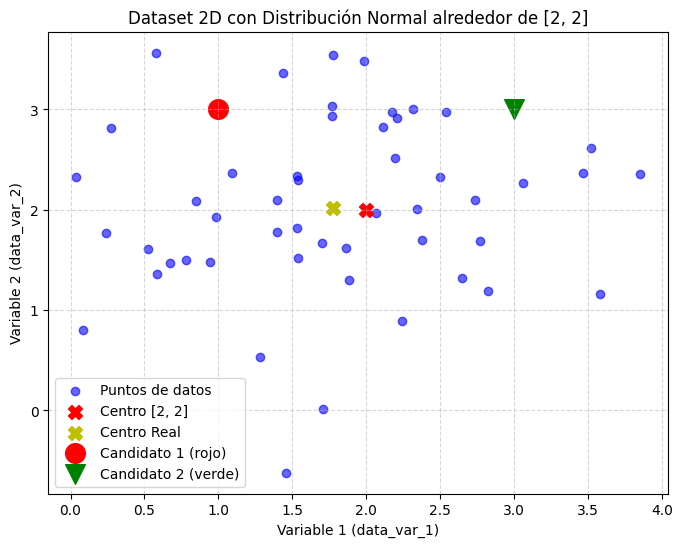

Centro real del cluster: x=1.77, y=2.02
Centro del cluster utilizado para el ejemplo: x=2.00, y=2.00


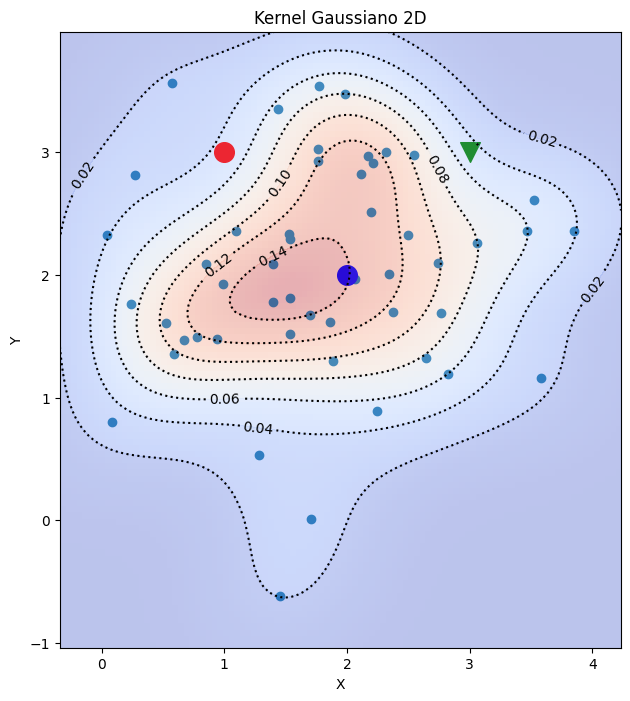

In [8]:
# Cargar dataset
ds_center = np.array([2, 2])
dx, dy =cargar_datasetDistNormal(50, ds_center)
# establecemos nuestros dos puntos candidatos de prueba
c1 = np.array([ds_center[0] - 1, 3])
c2 = np.array([ds_center[1] + 1, 3])
visualize_scatter(dx, dy, ds_center, c1, c2)
visualize_dataset(dx, dy, ds_center, c1, c2)

# 🎯 **EJ 1:GRAFIQUE LAS DISTRIBUCIONES DE LOS DATASETS**

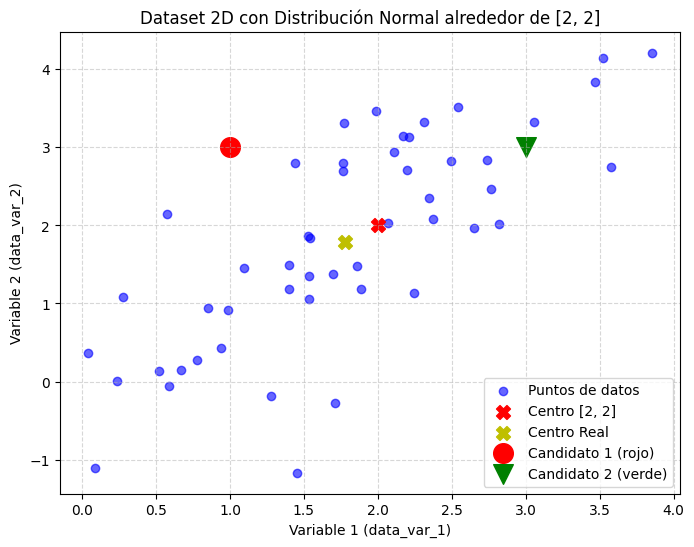

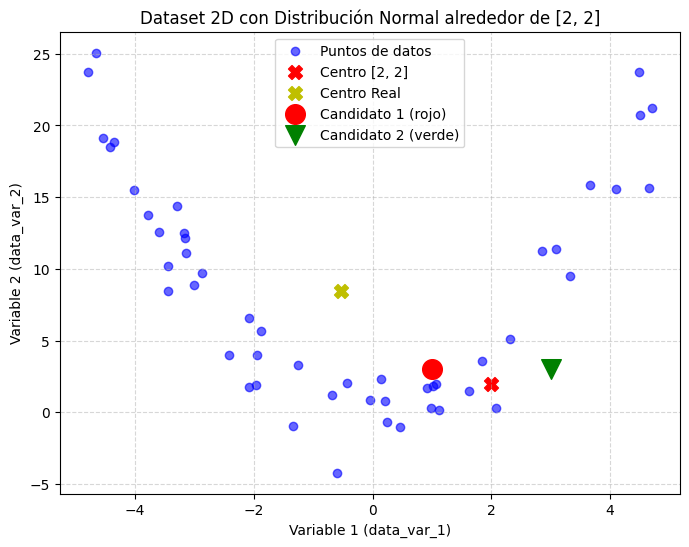

In [9]:
# TODO 1.1 crear y vizualizar el dataset con relacion lineal y con relacion cuadratica
dxr, dyr = cargar_datasetRelacionLineal() # Complete
visualize_scatter(dxr, dyr, ds_center, c1, c2)

dx2, dy2 = cargar_datasetRelacionCuadratica() # Complete
visualize_scatter(dx2, dy2, ds_center, c1, c2)

In [10]:
# Dataset grande
dxGrande, dyGrande =cargar_datasetRelacionLineal([20,10], 1000, [50,100])

# 🎯 **EJ 2: IDENTIFIQUE QUE TAN DEPENDIENTES SON LOS DATASETS**

In [11]:
# TODO 2.1 : Use la covarianza para identificar que tan dependiente es la relacion que existe entre los registros de los datasets {dx,dy}, {dxr, dyr}, {dx2, dy2} y {dxGrande, dyGrande}
# su codigo aqui np.cov
print(f'Covarianza dataset con distribución normal: ')
print(np.cov(dx, dy))
print(f'\nCovarianza dataset con relación lineal : ')
print(np.cov(dxr, dyr))
print(f'\nCovarianza dataset con relación lineal Grande: ')
print(np.cov(dxGrande, dyGrande))
print(f'\nCovarianza dataset con relación cuadratica: ')
print(np.cov(dx2, dy2))

Covarianza dataset con distribución normal: 
[[0.87173739 0.08985489]
 [0.08985489 0.76444418]]

Covarianza dataset con relación lineal : 
[[0.87173739 0.96159229]
 [0.96159229 1.81589137]]

Covarianza dataset con relación lineal Grande: 
[[383.54554143 375.65364293]
 [375.65364293 467.25326789]]

Covarianza dataset con relación cuadratica: 
[[ 8.34535038 -2.48409573]
 [-2.48409573 60.72673368]]


### 📈 **RESULTADOS:**
**Conteste las siguientes preguntas**

¿Qué dataset tiene una mayor dependencia lineal entre sus dos variables?
El dataset de dxGrande y dyGrande tiene la mayor dependencia lineal al tener  una gran covarianza de 375.65
¿Cual es el problema que tiene la covarianza?
El problema es que el valor de la covarianza depende de la escala de las variables, un valor alto no significa necesariamente una relacion lineal fuerte


In [12]:
# TODO 2.2: Use el coeficiente de correlación de Pearson para identificar que tan dependiente es la relacion que existe entre los registros de los datasets {dx,dy}, {dxr, dyr} y {dxGrande, dyGrande}
# su codigo aqui np.corrcoef
print(f'Correlación de Pearson dataset con distribución normal:')
print(np.corrcoef(dx, dy))
print(f'\nCorrelación de Pearson dataset con relación lineal :')
print(np.corrcoef(dxr, dyr))
print(f'\nCorrelación de Pearson dataset con relación lineal Grande:')
print(np.corrcoef(dxGrande, dyGrande))
print(f'\nCorrelación de Pearson dataset con relación cuadratica:')
print(np.corrcoef(dx2, dy2))

Correlación de Pearson dataset con distribución normal:
[[1.         0.11007179]
 [0.11007179 1.        ]]

Correlación de Pearson dataset con relación lineal :
[[1.         0.76428124]
 [0.76428124 1.        ]]

Correlación de Pearson dataset con relación lineal Grande:
[[1.         0.88736636]
 [0.88736636 1.        ]]

Correlación de Pearson dataset con relación cuadratica:
[[ 1.         -0.11034587]
 [-0.11034587  1.        ]]


### 📈 **RESULTADOS:**
**Conteste las siguientes preguntas**

¿Qué dataset tiene una mayor dependencia lineal entre sus dos variables?
El dataset de dxGrande y dyGrande tiene una mayor dependencia lineal con un coeficiente de correlacion de 0.887
¿Que medida es mas facil de interpretar para identificar la dependencia entre dos variables de un dataset?
Seria el coeficiente de correlacion de Pearson porque sus resltados son estandarizados y no dependen de la escala de los datos.

# 🎯 **EJ 3: CREE LAS FUNCIONES DE LAS MEDIDAS DE DISIMILITUD**

In [1]:
#  TODO 3.1 completar el codigo de las funciones de las siguientes medidas de disimilitud:
#  Distancia Euclidiana, Distancia Manhattan, Distancia Chebyshev, Similitud de Coseno, Mahalanobis y Jaccard
#  En scipy.spatial.distance tenemos disponibles las distancias minkowski, mahalanobis, jaccard, hamming, euclidean, cosine, entre otras.
#  En numpy tenemos la norma p =  np.linalg.norm

In [16]:
def distancia_euclidiana(p1, p2):
   dist = np.linalg.norm(p2 - p1)
   return dist

In [17]:
def distancia_manhattan(p1, p2):
   dist = np.linalg.norm(p2 - p1, ord=1)
   return dist

In [25]:
# ← COMPLETAR Chebyshev, Similitud de Coseno, Mahalanobis y Jaccard
import scipy.spatial.distance as dist_sp

def distancia_chebyshev(p1, p2):
    dist = np.linalg.norm(p2 - p1, ord=np.inf)
    return dist

def similitud_coseno(p1, p2):
    sim = 1 - dist_sp.cosine(p1, p2)
    return sim

def distancia_mahalanobis(p1, p2, cov_inv):
    dist = dist_sp.mahalanobis(p1, p2, cov_inv)
    return dist

def distancia_jaccard(p1, p2):
    p1_binary = (p1 > 0).astype(int)
    p2_binary = (p2 > 0).astype(int)
    dist = dist_sp.jaccard(p1_binary, p2_binary)
    return dist

In [26]:
# Ejecutar funciones
print("🔍 calculando las distancias de los puntos candidatos al centro")

# Distribución Normal
print('\nDistancias para Dataset con Distribución Normal:')
ds_center_1 = np.array([np.mean(dx), np.mean(dy)])
print(f'Centro del dataset: {ds_center_1}')

distancia_euclidiana(c1, ds_center_1)
distancia_euclidiana(c2, ds_center_1)

distancia_manhattan(c1, ds_center_1)
distancia_manhattan(c2, ds_center_1)

distancia_chebyshev(c1, ds_center_1)
distancia_chebyshev(c2, ds_center_1)

similitud_coseno(c1, ds_center_1)
similitud_coseno(c2, ds_center_1)

cov_1 = np.cov(dx, dy)
cov_inv_1 = np.linalg.inv(cov_1)
distancia_mahalanobis(c1, ds_center_1, cov_inv_1)
distancia_mahalanobis(c2, ds_center_1, cov_inv_1)

distancia_jaccard(c1, ds_center_1)
distancia_jaccard(c2, ds_center_1)


# Relación Lineal
print('\nDistancias para Dataset con Relación Lineal:')
ds_center_2 = np.array([np.mean(dxr), np.mean(dyr)])
print(f'Centro del dataset: {ds_center_2}')

distancia_euclidiana(c1, ds_center_2)
distancia_euclidiana(c2, ds_center_2)

distancia_manhattan(c1, ds_center_2)
distancia_manhattan(c2, ds_center_2)

distancia_chebyshev(c1, ds_center_2)
distancia_chebyshev(c2, ds_center_2)

similitud_coseno(c1, ds_center_2)
similitud_coseno(c2, ds_center_2)

cov_2 = np.cov(dxr, dyr)
cov_inv_2 = np.linalg.inv(cov_2)
distancia_mahalanobis(c1, ds_center_2, cov_inv_2)
distancia_mahalanobis(c2, ds_center_2, cov_inv_2)

distancia_jaccard(c1, ds_center_2)
distancia_jaccard(c2, ds_center_2)


# Relación Cuadrática
print('\nDistancias para Dataset con Relación Cuadrática:')
ds_center_3 = np.array([np.mean(dx2), np.mean(dy2)])
print(f'Centro del dataset: {ds_center_3}')

distancia_euclidiana(c1, ds_center_3)
distancia_euclidiana(c2, ds_center_3)

distancia_manhattan(c1, ds_center_3)
distancia_manhattan(c2, ds_center_3)

distancia_chebyshev(c1, ds_center_3)
distancia_chebyshev(c2, ds_center_3)

similitud_coseno(c1, ds_center_3)
similitud_coseno(c2, ds_center_3)

cov_3 = np.cov(dx2, dy2)
cov_inv_3 = np.linalg.inv(cov_3)
distancia_mahalanobis(c1, ds_center_3, cov_inv_3)
distancia_mahalanobis(c2, ds_center_3, cov_inv_3)

distancia_jaccard(c1, ds_center_3)
distancia_jaccard(c2, ds_center_3)


# Relación Lineal Grande
print('\nDistancias para Dataset con Relación Lineal Grande:')
ds_center_4 = np.array([np.mean(dxGrande), np.mean(dyGrande)])
print(f'Centro del dataset: {ds_center_4}')

distancia_euclidiana(c1, ds_center_4)
distancia_euclidiana(c2, ds_center_4)

distancia_manhattan(c1, ds_center_4)
distancia_manhattan(c2, ds_center_4)

distancia_chebyshev(c1, ds_center_4)
distancia_chebyshev(c2, ds_center_4)

similitud_coseno(c1, ds_center_4)
similitud_coseno(c2, ds_center_4)

cov_4 = np.cov(dxGrande, dyGrande)
cov_inv_4 = np.linalg.inv(cov_4)
distancia_mahalanobis(c1, ds_center_4, cov_inv_4)
distancia_mahalanobis(c2, ds_center_4, cov_inv_4)

distancia_jaccard(c1, ds_center_4)
distancia_jaccard(c2, ds_center_4)

🔍 calculando las distancias de los puntos candidatos al centro

Distancias para Dataset con Distribución Normal:
Centro del dataset: [1.77452609 2.01778087]

Distancias para Dataset con Relación Lineal:
Centro del dataset: [1.77452609 1.79230697]

Distancias para Dataset con Relación Cuadrática:
Centro del dataset: [-0.54076096  8.46409705]

Distancias para Dataset con Relación Lineal Grande:
Centro del dataset: [50.38664112 51.09500349]


np.float64(0.0)

### 📈 **RESULTADOS:**
**Conteste las siguientes preguntas**

¿Qué medidas de disimilitud son de un punto a otro punto?
Las medidas de distancia Euclidiana, de Manhatan, de Chevyshev, de Jaccard y la Similitud del Coseno,
¿Qué medidas de disimilitud son de un punto a una distribución?
Seria la distancia de Mahanobis
¿La distancia de Mahalanobis es capaz de tener en cuenta la distribución real de los datos?
Si porque Mahanobis utiliza una matriz de covarianza de la distribucion para normalizar la distancia, si una variable tiene una varianza mayor que otra la distancia se pondera y si hay variables correlacionadas la distancia de Mahanobis ajusta el espacion para mostrar una relacion.

# 🔄 **EJ 4: MATRIZ DE DISTANCIAS**

Cree un metodo que sea capaz de calcular la matriz de distancias de todos los puntos de un dataset, recive como parametros la medida de disimilitud y en algunos casos la matriz de covarianza

In [27]:
import itertools as it
#  TODO 4.1 completar el codigo
def matriz_distancias(X, distancia, mC=None):
    n_samples = X.shape[0]
    mD = np.zeros((n_samples, n_samples))
    for pair in it.product(np.arange(n_samples), repeat=2):
        if mC is not None:
            mD[pair] = distancia(X[pair[0], :], X[pair[1], :], mC)
        else:
            mD[pair] = distancia(X[pair[0], :], X[pair[1], :])
    return mD

In [28]:
# ← COMPLETAR calcule y grafique la matriz de distancias para todos los datasets y use la medida de disimilitud euclidiana y mahalanobis

# Dataset con Distribución Normal
X_normal = np.column_stack((dx, dy))
print('Calculando matrices para Dataset con Distribución Normal:')
Ma_euclidea_normal = matriz_distancias(X_normal, distancia_euclidiana)
cov_normal = np.cov(dx, dy)
cov_inv_normal = np.linalg.inv(cov_normal)
Ma_mahalanobis_normal = matriz_distancias(X_normal, distancia_mahalanobis, cov_inv_normal)
print('Matriz Euclídea (Normal):', Ma_euclidea_normal[:5,:5])
print('Matriz Mahalanobis (Normal):', Ma_mahalanobis_normal[:5,:5])

# Dataset con Relación Lineal
X_lineal = np.column_stack((dxr, dyr))
print('\nCalculando matrices para Dataset con Relación Lineal:')
Ma_euclidea_lineal = matriz_distancias(X_lineal, distancia_euclidiana)
cov_lineal = np.cov(dxr, dyr)
cov_inv_lineal = np.linalg.inv(cov_lineal)
Ma_mahalanobis_lineal = matriz_distancias(X_lineal, distancia_mahalanobis, cov_inv_lineal)
print('Matriz Euclídea (Lineal):', Ma_euclidea_lineal[:5,:5])
print('Matriz Mahalanobis (Lineal):', Ma_mahalanobis_lineal[:5,:5])

# Dataset con Relación Cuadrática
X_cuadratica = np.column_stack((dx2, dy2))
print('\nCalculando matrices para Dataset con Relación Cuadrática:')
Ma_euclidea_cuadratica = matriz_distancias(X_cuadratica, distancia_euclidiana)
cov_cuadratica = np.cov(dx2, dy2)
cov_inv_cuadratica = np.linalg.inv(cov_cuadratica)
Ma_mahalanobis_cuadratica = matriz_distancias(X_cuadratica, distancia_mahalanobis, cov_inv_cuadratica)
print('Matriz Euclídea (Cuadrática):', Ma_euclidea_cuadratica[:5,:5])
print('Matriz Mahalanobis (Cuadrática):', Ma_mahalanobis_cuadratica[:5,:5])

# Dataset con Relación Lineal Grande
X_grande = np.column_stack((dxGrande, dyGrande))
print('\nCalculando matrices para Dataset con Relación Lineal Grande:')
Ma_euclidea_grande = matriz_distancias(X_grande, distancia_euclidiana)
cov_grande = np.cov(dxGrande, dyGrande)
cov_inv_grande = np.linalg.inv(cov_grande)
Ma_mahalanobis_grande = matriz_distancias(X_grande, distancia_mahalanobis, cov_inv_grande)
print('Matriz Euclídea (Grande):', Ma_euclidea_grande[:5,:5])
print('Matriz Mahalanobis (Grande):', Ma_mahalanobis_grande[:5,:5])

Calculando matrices para Dataset con Distribución Normal:
Matriz Euclídea (Normal): [[0.         0.95190042 1.01232713 1.06584861 1.01680723]
 [0.95190042 0.         0.83838672 1.93737604 1.41932462]
 [1.01232713 0.83838672 0.         1.55778945 1.92214492]
 [1.06584861 1.93737604 1.55778945 0.         1.80652287]
 [1.01680723 1.41932462 1.92214492 1.80652287 0.        ]]
Matriz Mahalanobis (Normal): [[0.         1.00559597 1.18091974 1.11896027 1.1929166 ]
 [1.00559597 0.         0.94482618 2.01702317 1.64411471]
 [1.18091974 0.94482618 0.         1.66751726 2.27525495]
 [1.11896027 2.01702317 1.66751726 0.         2.00484762]
 [1.1929166  1.64411471 2.27525495 2.00484762 0.        ]]

Calculando matrices para Dataset con Relación Lineal:
Matriz Euclídea (Lineal): [[0.         1.48658085 0.86333479 1.6672367  0.7312599 ]
 [1.48658085 0.         0.92836934 3.13450835 1.32367049]
 [0.86333479 0.92836934 0.         2.3342787  1.2083264 ]
 [1.6672367  3.13450835 2.3342787  0.         2.20

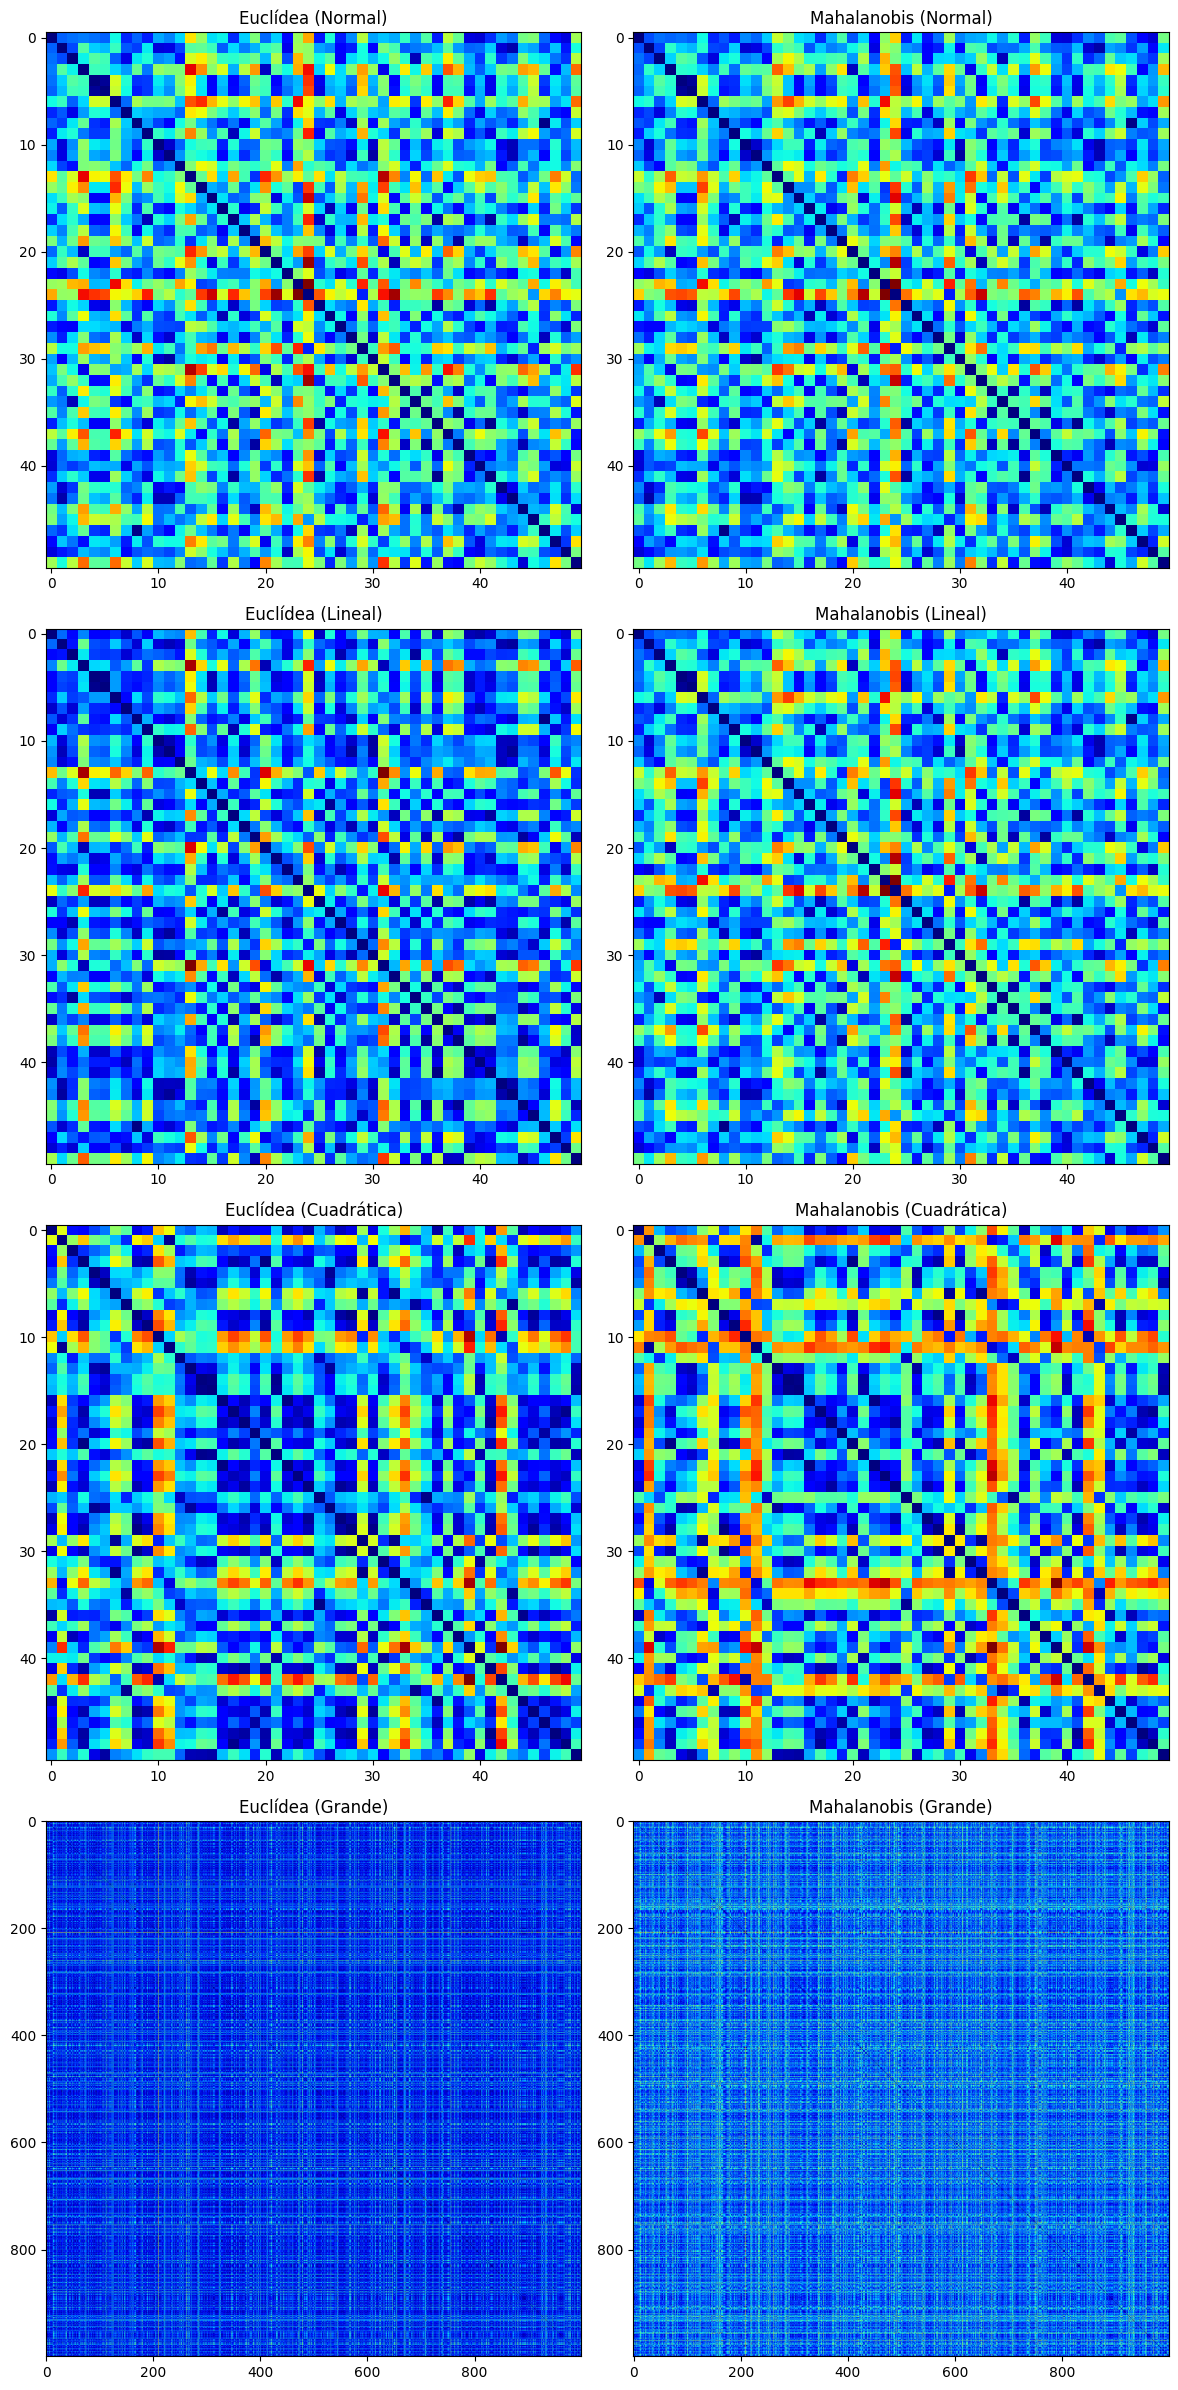

In [29]:
fig, ax = plt.subplots(4, 2, figsize=(12, 24))

# Distribución Normal
ax[0, 0].imshow(Ma_euclidea_normal, cmap='jet')
ax[0, 0].set_title('Euclídea (Normal)')
ax[0, 1].imshow(Ma_mahalanobis_normal, cmap='jet')
ax[0, 1].set_title('Mahalanobis (Normal)')

# Relación Lineal
ax[1, 0].imshow(Ma_euclidea_lineal, cmap='jet')
ax[1, 0].set_title('Euclídea (Lineal)')
ax[1, 1].imshow(Ma_mahalanobis_lineal, cmap='jet')
ax[1, 1].set_title('Mahalanobis (Lineal)')

# Relación Cuadrática
ax[2, 0].imshow(Ma_euclidea_cuadratica, cmap='jet')
ax[2, 0].set_title('Euclídea (Cuadrática)')
ax[2, 1].imshow(Ma_mahalanobis_cuadratica, cmap='jet')
ax[2, 1].set_title('Mahalanobis (Cuadrática)')

# Relación Lineal Grande
ax[3, 0].imshow(Ma_euclidea_grande, cmap='jet')
ax[3, 0].set_title('Euclídea (Grande)')
ax[3, 1].imshow(Ma_mahalanobis_grande, cmap='jet')
ax[3, 1].set_title('Mahalanobis (Grande)')

plt.tight_layout()
plt.show()

In [23]:
#Hasta ahora hemos visto todo disimilitudes (distancias). ¿Y si quisiéramos una medida de similitud?
def matriz_similitud(X, distancia, mC=None):
    if mC is not None:
        mD = matriz_distancias(X, distancia, mC)
    else:
        mD = matriz_distancias(X, distancia)
    # complete
    return 1 - mD

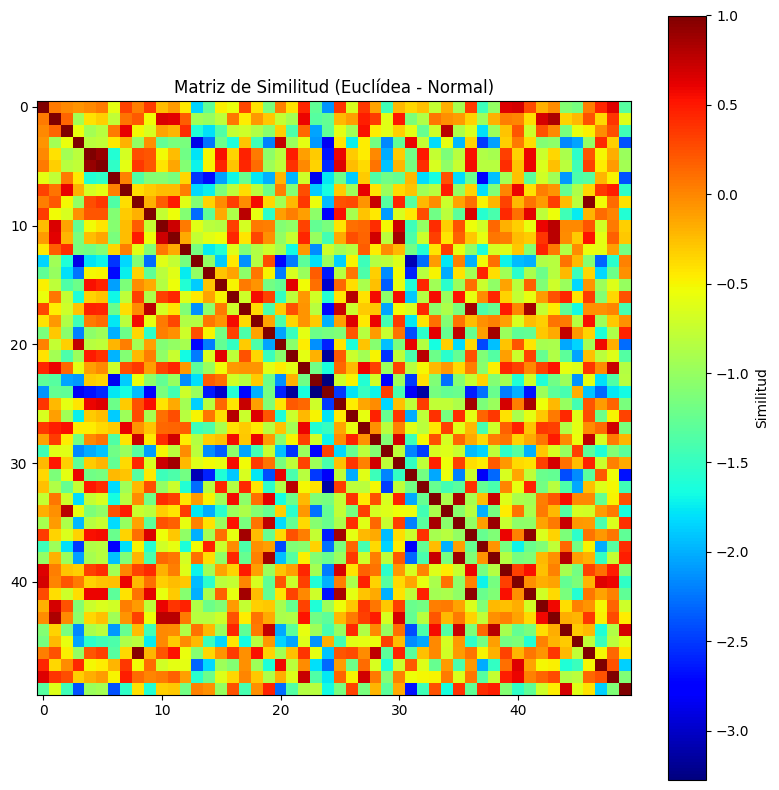

In [30]:
# Complete 4.3 Grafique la matriz de similitud
X_normal = np.column_stack((dx, dy))
Ma_similitud_normal = matriz_similitud(X_normal, distancia_euclidiana)

plt.figure(figsize=(8, 8))
plt.imshow(Ma_similitud_normal, cmap='jet')
plt.title('Matriz de Similitud (Euclídea - Normal)')
plt.colorbar(label='Similitud')
plt.tight_layout()
plt.show()


# ✅ **RESULTADOS:**
¿Cual grafico es mas facil de interpretar: el de una medida de disimilitud o de similitud?
El grafico de similitud es el mas facil de interpretar porque un valor mas alto significa que es mas parecido.


# 🚀 ¡TALLER FINALIZADO!"